<a href="https://colab.research.google.com/github/henrygas/tensorflow_2_learn/blob/master/tensorflow_homework_senior_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

tf.logging.set_verbosity(tf.logging.INFO)
print(tf.__version__)
print(np.__version__)

1.15.0-rc3
1.16.5


In [0]:
mnist = input_data.read_data_sets("./")
print(mnist.train.images.shape)
print(mnist.train.labels.shape)
print(mnist.validation.images.shape)
print(mnist.validation.labels.shape)
print(mnist.test.images.shape)
print(mnist.test.labels.shape)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
(55000, 784)
(55000,)
(5000, 784)
(5000,)
(10000, 784)
(10000,)


In [74]:
x = tf.placeholder("float", [None, 784])
y = tf.placeholder("int64", [None])
learning_rate = tf.placeholder("float")

L1_units_count = 20
L2_units_count = 200
L3_units_count = 10

min_val = -1
max_val = 1

W_1 = tf.Variable(tf.truncated_normal([784, L1_units_count], stddev=0.1))
b_1 = tf.Variable(tf.truncated_normal([L1_units_count], stddev=0.1))
logits_1 = tf.matmul(x, W_1) + b_1
output_1 = tf.nn.relu(logits_1)

W_2 = tf.Variable(tf.truncated_normal([L1_units_count, L2_units_count], stddev=0.1))
b_2 = tf.Variable(tf.truncated_normal([L2_units_count], stddev=0.1))
logits_2 = tf.matmul(output_1, W_2) + b_2
output_2 = tf.nn.relu(logits_2)

W_3 = tf.Variable(tf.truncated_normal([L2_units_count, L3_units_count], stddev=0.1))
b_3 = tf.Variable(tf.truncated_normal([L3_units_count], stddev=0.1))
logits_3 = tf.matmul(output_2, W_3) + b_3

logits = logits_3

cross_entropy_loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy_loss)

pred = tf.nn.softmax(logits)
correct_pred = tf.equal(tf.argmax(pred, 1), y)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

batch_size = 16
max_train_step = 3000
print("max_train_step:", max_train_step)
learning_rate_value = 0.2
max_try_times = 3
saver = tf.train.Saver()

acc_validation_max = 0

loss_array = list()

try_times = 0
while try_times < max_try_times:
  try_times += 1
  with tf.Session() as ses:
    ses.run(tf.global_variables_initializer())
    for i in range(max_train_step):
      xs, ys = mnist.train.next_batch(batch_size)
      _, loss = ses.run([optimizer, cross_entropy_loss],
                feed_dict={
                    x: xs,
                    y: ys,
                    learning_rate: learning_rate_value
                })

      if try_times == 1:
        loss_array.append(loss)

      if i % int(max_train_step / 10) == 0:
        print("loss[{}]={}".format(i, loss))

    acc_validation = ses.run(accuracy, feed_dict={
        x: mnist.validation.images,
        y: mnist.validation.labels
    })
    if acc_validation > acc_validation_max:
      acc_validation_max = acc_validation
      saver.save(ses, "./validation_model.ckpt")

    print("The {} th times of training is over. loss:{}, acc_validation:{}\n".format(try_times, loss, acc_validation))
    
# using model to run
with tf.Session() as ses:
  saver.restore(ses, "./validation_model.ckpt")
  acc_train = ses.run(accuracy, feed_dict={
      x: mnist.train.images,
      y: mnist.train.labels
  })
  acc_validation = ses.run(accuracy, feed_dict={
      x: mnist.validation.images,
      y: mnist.validation.labels
  })
  acc_test = ses.run(accuracy, feed_dict={
      x: mnist.test.images,
      y: mnist.test.labels
  })
  print("using validation_model.ckpt, acc_train:{}, acc_validation:{}, acc_test:{}".format(acc_train, acc_validation, acc_test))

max_train_step: 3000
loss[0]=2.333723306655884
loss[300]=0.46770888566970825
loss[600]=0.13779017329216003
loss[900]=0.07362165302038193
loss[1200]=0.45585864782333374
loss[1500]=0.25800415873527527
loss[1800]=0.45465919375419617
loss[2100]=0.20444948971271515
loss[2400]=0.10402853786945343
loss[2700]=0.253828763961792
The 1 th times of training is over. loss:0.08540062606334686, acc_validation:0.9416000247001648

loss[0]=2.253824234008789
loss[300]=0.35208871960639954
loss[600]=0.1741502583026886
loss[900]=0.513623833656311
loss[1200]=0.2743169963359833
loss[1500]=0.17156177759170532
loss[1800]=0.44867169857025146
loss[2100]=0.14449994266033173
loss[2400]=0.3172515630722046
loss[2700]=0.10690061002969742
The 2 th times of training is over. loss:0.04007440432906151, acc_validation:0.9527999758720398

loss[0]=2.32106351852417
loss[300]=0.21392126381397247
loss[600]=0.10232063382863998
loss[900]=0.31826743483543396
loss[1200]=0.08384053409099579
loss[1500]=0.6368974447250366
loss[1800]=0

[   0    1    2 ... 2997 2998 2999]
[2.3337233  2.2198973  2.2608893  ... 0.70976883 0.3173942  0.08540063]


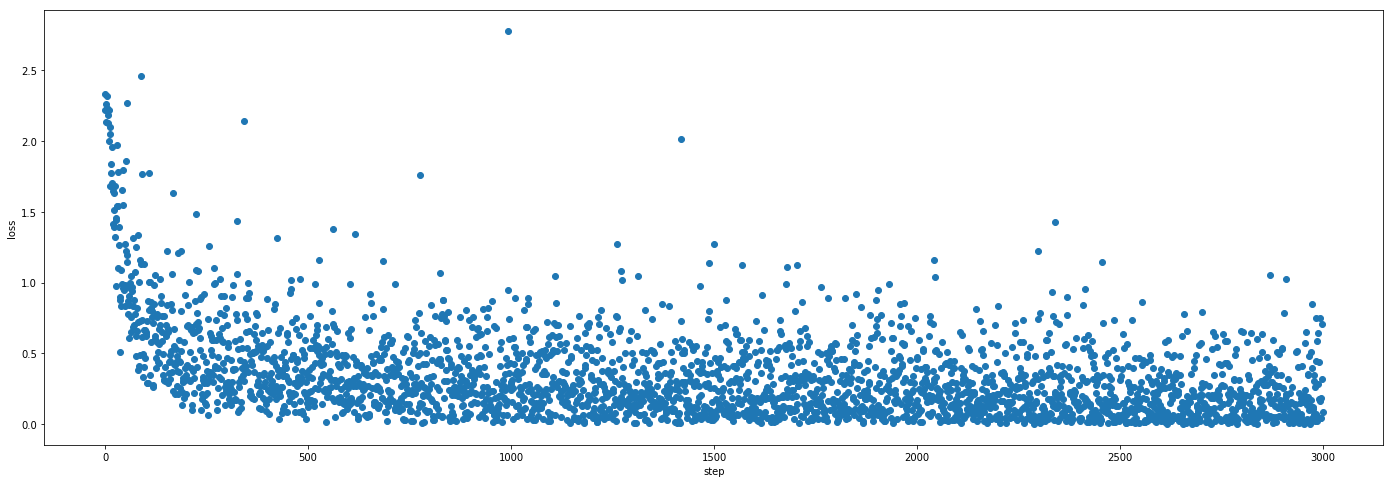

In [81]:
steps = []
for i in range(len(loss_array)):
  steps.append(i)
  
x_array = np.array(steps)
print(x_array)

y_array = np.array(loss_array)
print(y_array)

plt.figure(figsize=(24, 8))
plt.xlabel("step")
plt.ylabel("loss")
plt.scatter(x_array, y_array)